# Note to team - this notebook will model a LOT faster if you download and run it locally in Jupyter. Finetune locally and not here in Collab.

# Install packages


In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 8.4 MB/s eta 0:00:00


# Import libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from google.colab import drive
import sys

# Import tokenizer and pre-trained model

In [ ]:
#tokenizer: https://www.techtarget.com/searchenterpriseai/definition/BERT-language-model
#switched from BertTokenizer and TFBertForSequenceClassification to DistilBert...
#... because it was taking hours locally (eventually crashed my computer)...
#... and maxing out free Google Colab RAM. Now it takes about 30 minutes locally and 2 hours in Colab.
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

# Mount Google Drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Random Seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Load data

In [ ]:
import pandas as pd

# Load the raw training data
df_raw_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/data/train.csv")
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/project/data/test.csv")
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'target'


In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,7613,5


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,3263,4


In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# Drop columns that we don't need

In [ ]:
#drop columns
df_train.drop(['id','keyword','location'],axis=1,inplace=True)
df_test.drop(['id','keyword','location'],axis=1,inplace=True)

In [ ]:
# Print the first 5 rows of df_train to ensure dropping worked correctly
df_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Print the first 5 rows of df_test to ensure dropping worked correctly
df_test.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


# Training and validation data split (remove - no longer required)

In [ ]:
#from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
#df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
#df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
#pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,6090,2


In [ ]:
# Print the dimension of df_val
#pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1523,2


# Split features and target

In [ ]:
# Batch tokenize our tweet field
X_train = tokenizer.batch_encode_plus(df_train.text, pad_to_max_length=True, return_tensors="tf")
#X_val = tokenizer.batch_encode_plus(df_val.text, pad_to_max_length=True, return_tensors="tf")
X_test = tokenizer.batch_encode_plus(df_test.text, pad_to_max_length=True, return_tensors="tf")

# Get our target
y_train = df_train['target'].to_numpy()
#y_val = df_val['target'].to_numpy()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Optimize model

In [ ]:
#optimize model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
bce = tf.keras.losses.BinaryCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
#fine tune parameters? https://github.com/uzaymacar/comparatively-finetuning-bert

# Compile and train model on training data (with 80/20 train/val split)

In [ ]:
#compile and train model on training data
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
history = model.fit(x=X_train['input_ids'], y=y_train, epochs=2, batch_size=15, verbose=1, validation_split=0.2)
#previously had more epochs, but reduced iterations as per official guidance from BERT's documentation...
#... (and also it was taking forever)

Epoch 1/2
406/406 [==============================] - 3866s 9s/step - loss: 0.4583 - accuracy: 0.7998 - val_loss: 0.3966 - val_accuracy: 0.8234
Epoch 2/2
406/406 [==============================] - 3656s 9s/step - loss: 0.3234 - accuracy: 0.8749 - val_loss: 0.3872 - val_accuracy: 0.8293


# Evaluate model

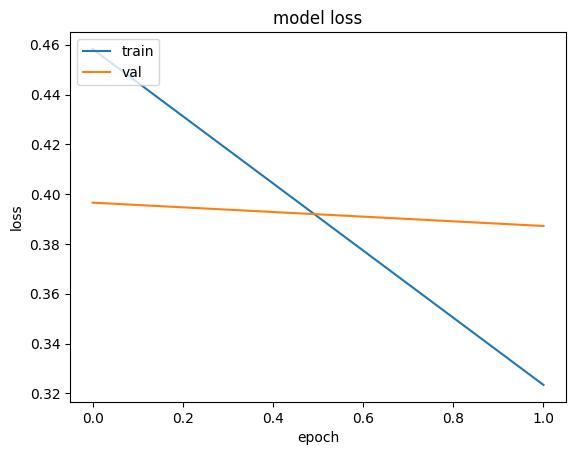

In [ ]:
#add plot to show val_loss compared to train loss. val_loss should descrease over epochs (I think). if it doesn't, model is overfitting.
history.history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

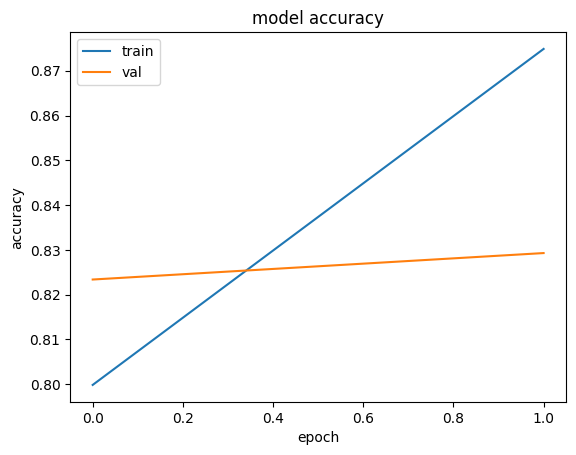

In [ ]:
#add plot to show val_accuracy compared to train accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Make predictions

In [ ]:
#predict
predictions = model.predict(X_test['input_ids'])
predictions_label = [np.argmax(x) for x in predictions[0]]
#print results
results = pd.DataFrame({'id': df_raw_test['id'], 'target': predictions_label})
results['target'] = results['target'].astype('int')
results.to_csv('predictions.csv', index=False)
#profit!

102/102 [==============================] - 463s 4s/step
